In [7]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [8]:
%load_ext autoreload
%autoreload
exec(open("plot_utils.py").read())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


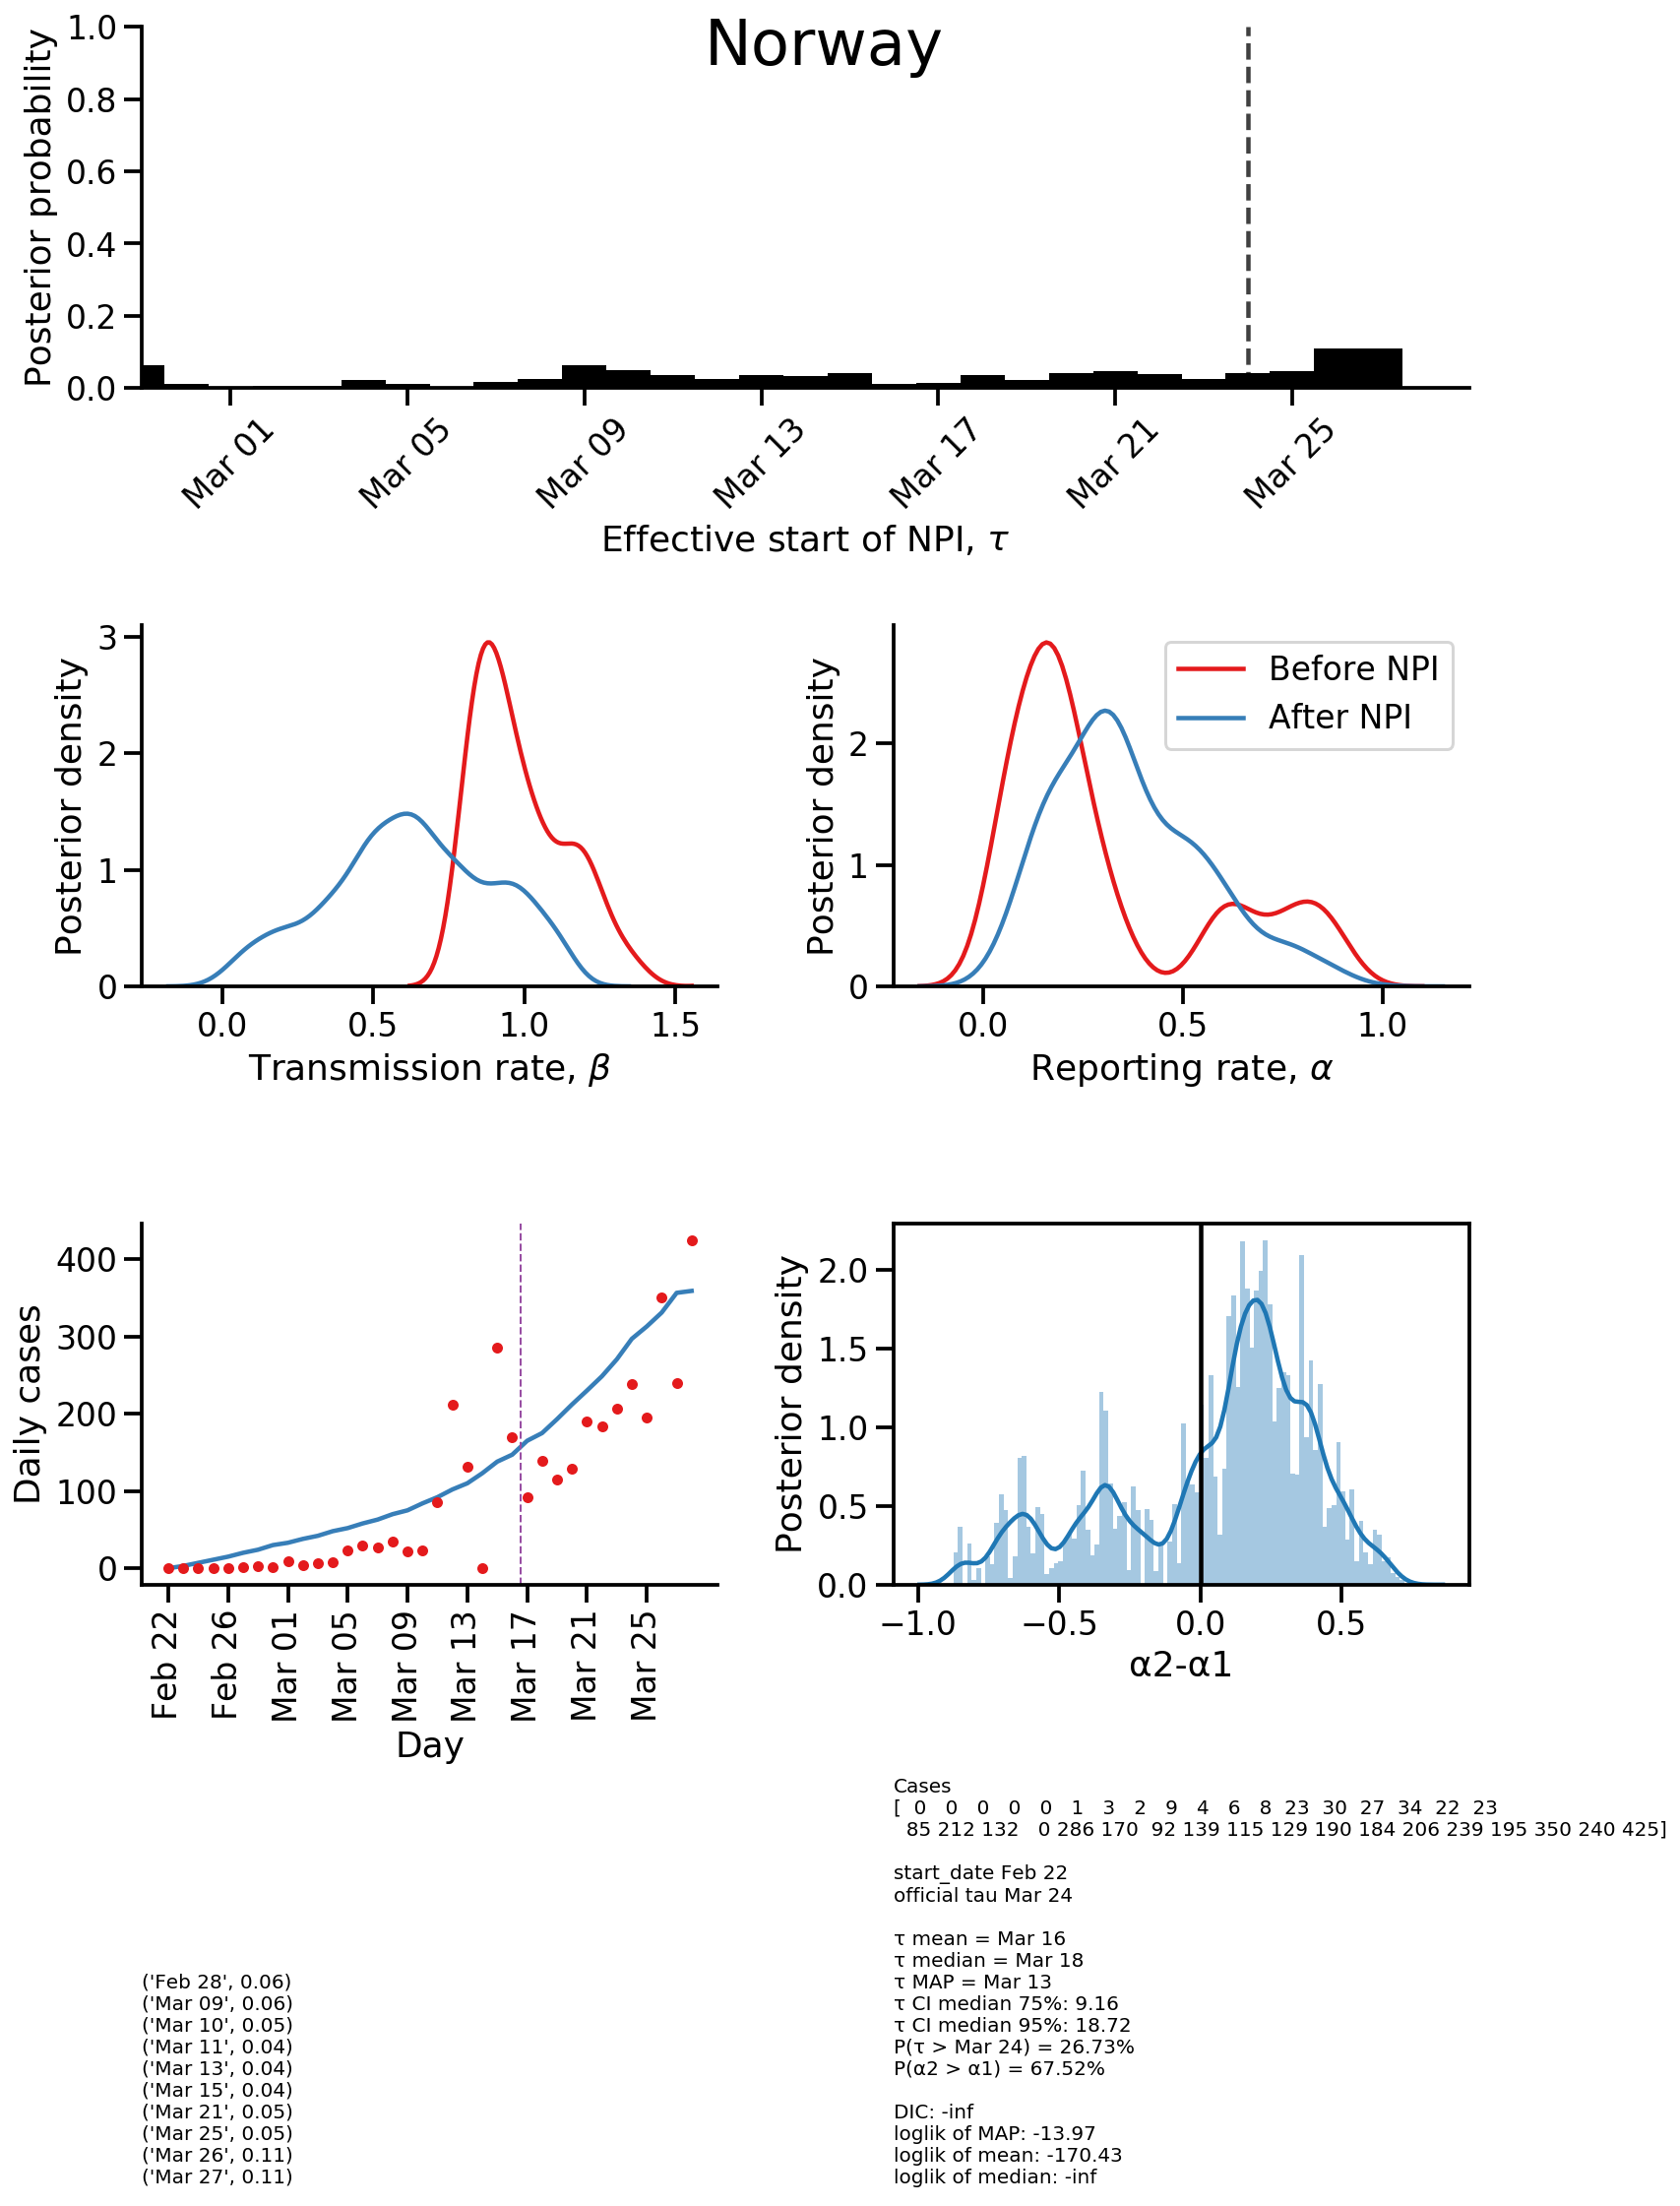

In [16]:
country_name = 'Norway'
file_name = '../output/2020-04-29-prior-walkers-autocorr-model1-uniform/inference/{}.npz'.format(country_name)
file_name = '../output-tmp/2020-05-12-test/inference/{}.npz'.format(country_name)
# file_name = 'test.npz'
data = load_data(file_name, country_name)
plot_all();
# plot_corner();